## Import Libraries

In [175]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [176]:
print(tf.__version__)

2.1.0


## Data Preprocessing

In [177]:
data = pd.read_csv("Churn_Modelling.csv")

In [178]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [179]:
data.shape

(10000, 14)

In [180]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [181]:
data.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [183]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [184]:
data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [185]:
X = data.iloc[:,3:-1]
y = data.iloc[:,-1]

In [186]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [187]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [188]:
X["Geography"].unique(), X["Gender"].unique()

(array(['France', 'Spain', 'Germany'], dtype=object),
 array(['Female', 'Male'], dtype=object))

In [189]:
## Encoding The Categorical Data Using get_dummies function from pandas

In [190]:
new_data = pd.get_dummies(X["Gender"],drop_first=True,)
new_data.head(4)

,Male
0,0
1,0
2,0
3,0


In [191]:
X = pd.concat([X, new_data],axis=1)

In [192]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [193]:
X.drop("Gender",axis=1,inplace=True)

In [194]:
X.rename(columns={"Male":"Gender"})

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender
0,619,France,42,2,0.00,1,1,1,101348.88,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,0
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,39,5,0.00,2,1,0,96270.64,1
9996,516,France,35,10,57369.61,1,1,1,101699.77,1
9997,709,France,36,7,0.00,1,0,1,42085.58,0
9998,772,Germany,42,3,75075.31,2,1,0,92888.52,1


In [195]:
# Encoding the categorical data Using LabelEncoder
from sklearn.preprocessing import LabelEncoder 

In [196]:
label_1 = LabelEncoder()
X["Geography"] = label_1.fit_transform(X["Geography"])

In [197]:
X = pd.get_dummies(X,drop_first=True,columns=["Geography"])

In [198]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Geography_1,Geography_2
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [199]:
## Spliting the data from X_train,y_train, X_test,y_test
from sklearn.model_selection import train_test_split

In [200]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

In [201]:
print(f"X_train.shape : {X_train.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"X_test.shape : {X_test.shape}")
print(f"y_test.shape : {y_test.shape}")

X_train.shape : (7500, 11)
y_train.shape : (7500,)
X_test.shape : (2500, 11)
y_test.shape : (2500,)


In [202]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [203]:
sc = StandardScaler()

In [204]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [205]:
X_train

array([[-0.73550706,  0.01526571,  0.00886037, ..., -1.08726059,
         1.76021608, -0.57468161],
       [ 1.02442719, -0.65260917,  0.00886037, ..., -1.08726059,
        -0.56811207, -0.57468161],
       [ 0.80829492, -0.46178778,  1.39329338, ..., -1.08726059,
        -0.56811207,  1.74009395],
       ...,
       [ 0.90092304, -0.36637708,  0.00886037, ...,  0.91974271,
        -0.56811207, -0.57468161],
       [-0.62229491, -0.08014499,  1.39329338, ..., -1.08726059,
        -0.56811207,  1.74009395],
       [-0.28265848,  0.87396199, -1.37557264, ..., -1.08726059,
         1.76021608, -0.57468161]])

In [206]:
X_test

array([[-0.55025082, -0.36637708,  1.04718513, ..., -1.08726059,
         1.76021608, -0.57468161],
       [-1.31185979,  0.11067641, -1.02946438, ..., -1.08726059,
        -0.56811207, -0.57468161],
       [ 0.57157862,  0.3014978 ,  1.04718513, ..., -1.08726059,
        -0.56811207,  1.74009395],
       ...,
       [ 1.95070838,  0.01526571, -1.37557264, ..., -1.08726059,
        -0.56811207, -0.57468161],
       [ 0.29369426, -0.08014499,  0.70107688, ...,  0.91974271,
         1.76021608, -0.57468161],
       [ 0.870047  , -0.74801987, -0.68335613, ...,  0.91974271,
        -0.56811207, -0.57468161]])

In [233]:
# Creating an object (Initilizing the ANN)
model = keras.Sequential([
    keras.layers.Dense(256, activation="relu", input_dim = 11),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
])

In [234]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [235]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               3072      
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 36,097
Trainable params: 36,097
Non-trainable params: 0
_________________________________________________________________


In [238]:
num_epochs = 60
history = model.fit(X_train,y_train, batch_size = 10,epochs = num_epochs, validation_data = (X_test,y_test), verbose=2)

Train on 7500 samples, validate on 2500 samples
Epoch 1/60
7500/7500 - 1s - loss: 0.2437 - accuracy: 0.9003 - val_loss: 0.5200 - val_accuracy: 0.8492
Epoch 2/60
7500/7500 - 1s - loss: 0.2306 - accuracy: 0.9073 - val_loss: 0.5171 - val_accuracy: 0.8464
Epoch 3/60
7500/7500 - 1s - loss: 0.2165 - accuracy: 0.9088 - val_loss: 0.5320 - val_accuracy: 0.8460
Epoch 4/60
7500/7500 - 1s - loss: 0.2162 - accuracy: 0.9077 - val_loss: 0.5269 - val_accuracy: 0.8428
Epoch 5/60
7500/7500 - 1s - loss: 0.2125 - accuracy: 0.9120 - val_loss: 0.5371 - val_accuracy: 0.8412
Epoch 6/60
7500/7500 - 1s - loss: 0.2047 - accuracy: 0.9132 - val_loss: 0.5663 - val_accuracy: 0.8428
Epoch 7/60
7500/7500 - 1s - loss: 0.2007 - accuracy: 0.9156 - val_loss: 0.5906 - val_accuracy: 0.8328
Epoch 8/60
7500/7500 - 1s - loss: 0.2062 - accuracy: 0.9127 - val_loss: 0.5604 - val_accuracy: 0.8368
Epoch 9/60
7500/7500 - 1s - loss: 0.2128 - accuracy: 0.9105 - val_loss: 0.5521 - val_accuracy: 0.8428
Epoch 10/60
7500/7500 - 1s - loss:

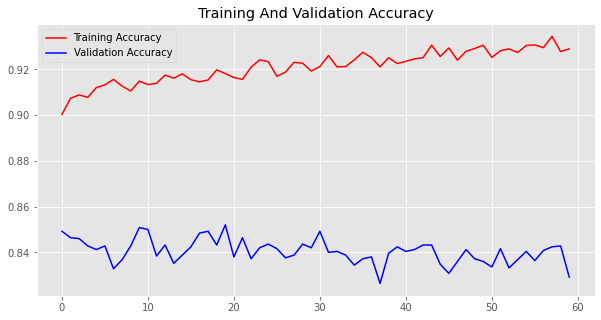

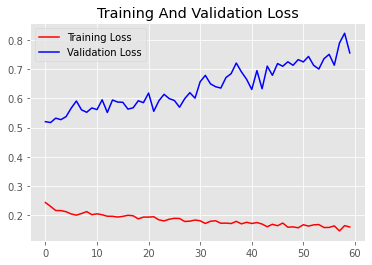

In [244]:
plt.figure(figsize=(10,5))
plt.style.use("ggplot")

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epoch = range(len(acc))

plt.plot(epoch, acc, "r", label = "Training Accuracy")
plt.plot(epoch, val_acc, "b", label = "Validation Accuracy")
plt.title("Training And Validation Accuracy")

plt.legend()
plt.figure()

plt.plot(epoch, loss, "r", label = "Training Loss")
plt.plot(epoch, val_loss, "b", label = "Validation Loss")
plt.title("Training And Validation Loss")

plt.legend()
plt.show()

In [248]:
# Evaluate the model
test_loss , test_acc = model.evaluate(X_test,y_test.to_numpy())

2500/2500 [==============================] - 0s 20us/sample - loss: 0.7549 - accuracy: 0.8292
